**Problem 1**

Let f(x)=2sinx−cos2x. Write a function beauty_derivative_plot that takes a point x and plots the function f(x) and its derivative f′(x) in the range x∈[−2π,2π]. The function should also plot the tangent line to the function at the point x.

Example of output for x=−3,−2,1.7:

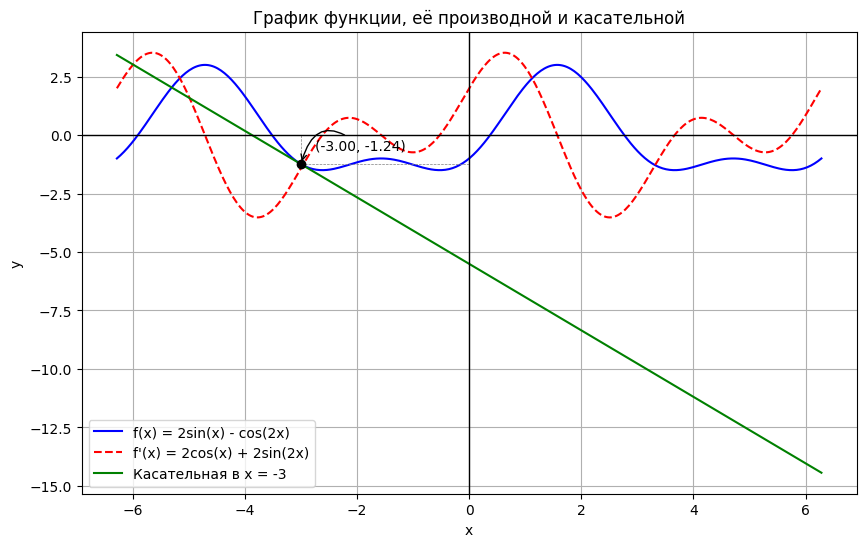

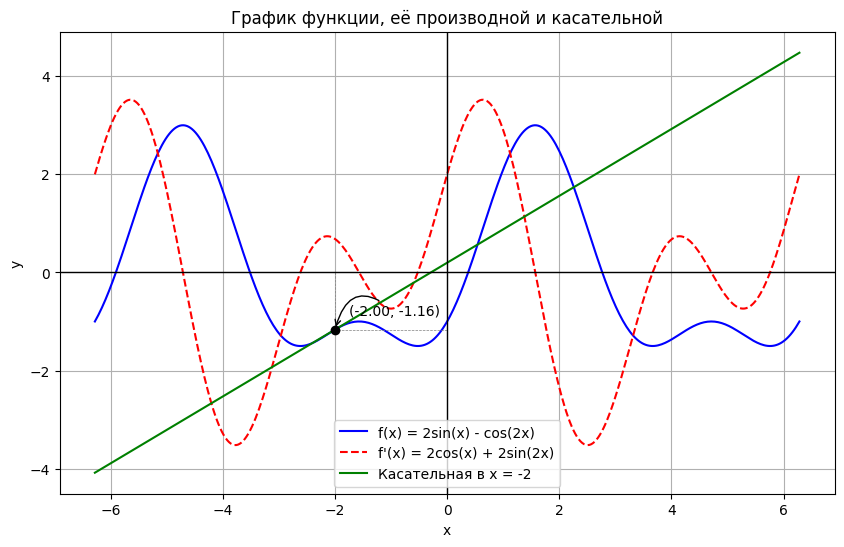

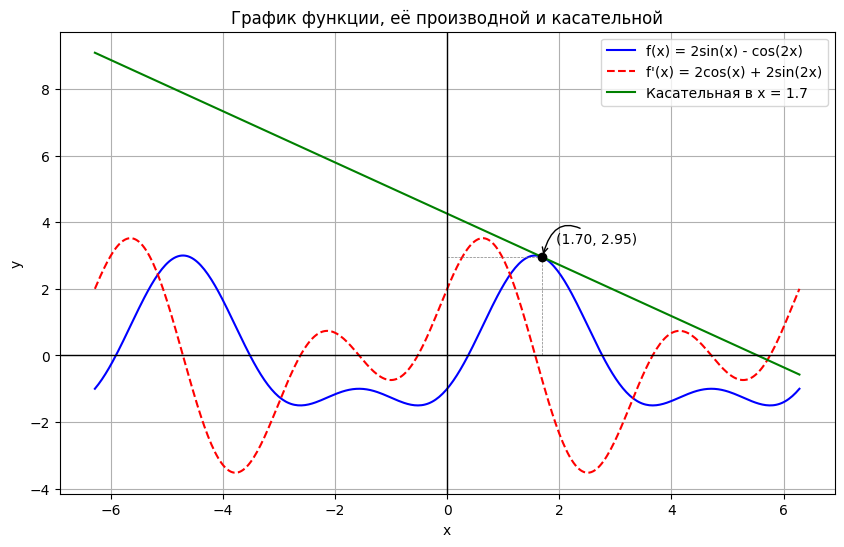

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2*np.sin(x) - np.cos(2*x)

def f_derivative(x):
    return 2*np.cos(x) + 2*np.sin(2*x)

def beauty_derivative_plot(x0):

    x = np.linspace(-2*np.pi, 2*np.pi, 400)

    y_f = f(x)
    y_f_derivative = f_derivative(x)

    f_x0 = f(x0)
    f_derivative_x0 = f_derivative(x0)

    # уравнение касательной
    tangent_line = f_x0 + f_derivative_x0*(x - x0)

    # размер рисунка
    plt.figure(figsize=(10, 6))

    plt.plot(x, y_f, label="f(x) = 2sin(x) - cos(2x)", color='blue')
    plt.plot(x, y_f_derivative, label="f'(x) = 2cos(x) + 2sin(2x)", color='red', linestyle='--')
    plt.plot(x, tangent_line, label=f"Касательная в x = {x0}", color='green')

    plt.scatter([x0], [f_x0], color='black', zorder=5)
    # подпись с координатами точки касания
    plt.annotate(f"({x0:.2f}, {f_x0:.2f})", xy=(x0, f_x0), xycoords='data',
                 xytext=(10, 10), textcoords='offset points', fontsize=10,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"))

    # проекции точки касания на оси
    plt.plot([x0, x0], [0, f_x0], linestyle='--', color='gray', linewidth=0.5)
    plt.plot([0, x0], [f_x0, f_x0], linestyle='--', color='gray', linewidth=0.5)

    # координатные оси
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    plt.title(f"График функции, её производной и касательной")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.show()

# примеры
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)